
<h1>
<span style="color: red;">Datamining project: Fromages</span>
</h1>

<h1> <span style="color: blue;">Elaborated by Mariem Bahri  </span>
</h1>

Les données fournies concernent les valeurs nutritionnelles de divers types de fromages et de produits laitiers. Elles comprennent les mesures suivantes pour chaque produit : calories, sodium, calcium, lipides, rétinol (vitamine A), folates (vitamine B9), protéines, cholestérol et magnésium, ainsi que les noms des produits.
Chaque ligne représente un type de fromage ou de produit laitier différent, avec ses valeurs nutritionnelles associées. Ces données permettent d'analyser les différences et les similarités entre les produits en termes de contenu nutritionnel.

Chargement des données depuis le fichier Fromage.xlsx

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df=pd.read_excel("Fromage.xlsx")
print(df.head(5))

      Fromages  calories  sodium  calcium  lipides  retinol  folates  proteines  cholesterol  \
0  CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0           70   
1      Babybel       314   238.0    209.8     25.1     63.7      6.4       22.6           70   
2     Beaufort       401   112.0    259.4     33.3     54.9      1.2       26.6          120   
3         Bleu       342   336.0    211.1     28.9     37.1     27.5       20.2           90   
4    Camembert       264   314.0    215.9     19.5    103.0     36.4       23.4           60   

   magnesium  
0         20  
1         27  
2         41  
3         27  
4         20  


Description des données : 

Ces statistiques fournissent une vue d'ensemble des distributions et des tendances centrales des données nutritionnelles, ce qui peut être utile pour évaluer la composition nutritionnelle des aliments et comparer les produits entre eux

In [8]:
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
print(df.describe())

       calories   sodium  calcium  lipides  retinol  folates  proteines  cholesterol  magnesium
count    29.000   29.000   29.000   29.000   29.000   29.000     29.000       29.000     29.000
mean    300.034  210.086  184.379   24.159   67.562   13.910     20.159       74.586     26.966
std      91.914  108.679   71.210    8.130   24.163   12.074      6.964       28.246     11.318
min      70.000   22.000   72.600    3.400   37.100    1.200      4.100       10.000     10.000
25%     292.000  140.000  132.900   23.400   51.600    5.200     17.800       70.000     20.000
50%     321.000  223.000  202.300   26.300   62.300    6.700     21.000       80.000     26.000
75%     355.000  276.000  219.000   29.100   76.400   22.600     23.400       90.000     30.000
max     406.000  432.000  334.600   33.300  150.500   36.400     35.700      120.000     51.000


In [9]:
df.shape
df.columns.to_list()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fromages     29 non-null     object 
 1   calories     29 non-null     int64  
 2   sodium       29 non-null     float64
 3   calcium      29 non-null     float64
 4   lipides      29 non-null     float64
 5   retinol      29 non-null     float64
 6   folates      29 non-null     float64
 7   proteines    29 non-null     float64
 8   cholesterol  29 non-null     int64  
 9   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 2.4+ KB


Preprocessing 

Premiére etape de Preprocessing : Exclure la première colonne (noms de fromages) lors de la sélection des caractéristiques pour que tous les valeurs soient numériques


In [12]:
X = df.iloc[:, 1:].values
print(X)


[[314.  353.5  72.6  26.3  51.6  30.3  21.   70.   20. ]
 [314.  238.  209.8  25.1  63.7   6.4  22.6  70.   27. ]
 [401.  112.  259.4  33.3  54.9   1.2  26.6 120.   41. ]
 [342.  336.  211.1  28.9  37.1  27.5  20.2  90.   27. ]
 [264.  314.  215.9  19.5 103.   36.4  23.4  60.   20. ]
 [367.  256.  264.   28.8  48.8   5.7  23.   90.   30. ]
 [344.  192.   87.2  27.9  90.1  36.3  19.5  80.   36. ]
 [292.  276.  132.9  25.4 116.4  32.5  17.8  70.   25. ]
 [406.  172.  182.3  32.5  76.4   4.9  26.  110.   28. ]
 [399.   92.  220.5  32.4  55.9   1.3  29.2 120.   51. ]
 [308.  222.   79.2  25.6  63.6  21.1  20.5  80.   13. ]
 [327.  148.  272.2  24.7  65.7   5.5  24.7  80.   44. ]
 [378.   60.  308.2  29.4  56.3   2.4  29.4 110.   45. ]
 [206.  160.   72.8  18.5 150.5  31.   11.1  50.   16. ]
 [292.  390.  168.5  24.   77.4   5.5  16.8  70.   20. ]
 [ 80.   41.  146.3   3.5  50.    2.4   8.3  10.   11. ]
 [115.   25.   98.4   7.8  64.3  31.    7.   30.   10. ]
 [338.  311.  236.8  29.1  46.7

Aprés on va vérifier si on a des valeurs nulls, si oui on va les traiter : Dans le cas de notre dataframe on a pas des valeurs null.

In [14]:
print(df.isnull().sum())


Fromages       0
calories       0
sodium         0
calcium        0
lipides        0
retinol        0
folates        0
proteines      0
cholesterol    0
magnesium      0
dtype: int64


L'etape suivante est de redimensionner chaque observation pour avoir unenorme unitaire, donc on va faire une normalisation :

In [15]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler().fit(X)
StandardisedX=Scaler.transform(X)
np.set_printoptions(precision=3)
print(StandardisedX[0:5,:])

[[ 0.155  1.343 -1.598  0.268 -0.672  1.381  0.123 -0.165 -0.626]
 [ 0.155  0.261  0.363  0.118 -0.163 -0.633  0.357 -0.165  0.003]
 [ 1.118 -0.919  1.072  1.144 -0.533 -1.071  0.941  1.636  1.262]
 [ 0.465  1.179  0.382  0.594 -1.283  1.145  0.006  0.555  0.003]
 [-0.399  0.973  0.45  -0.583  1.493  1.896  0.474 -0.526 -0.626]]


Maintenant, on va utiliser la librairie scikit-learn pour effectuer une Classification Ascendante Hiérarchique (CAH) 

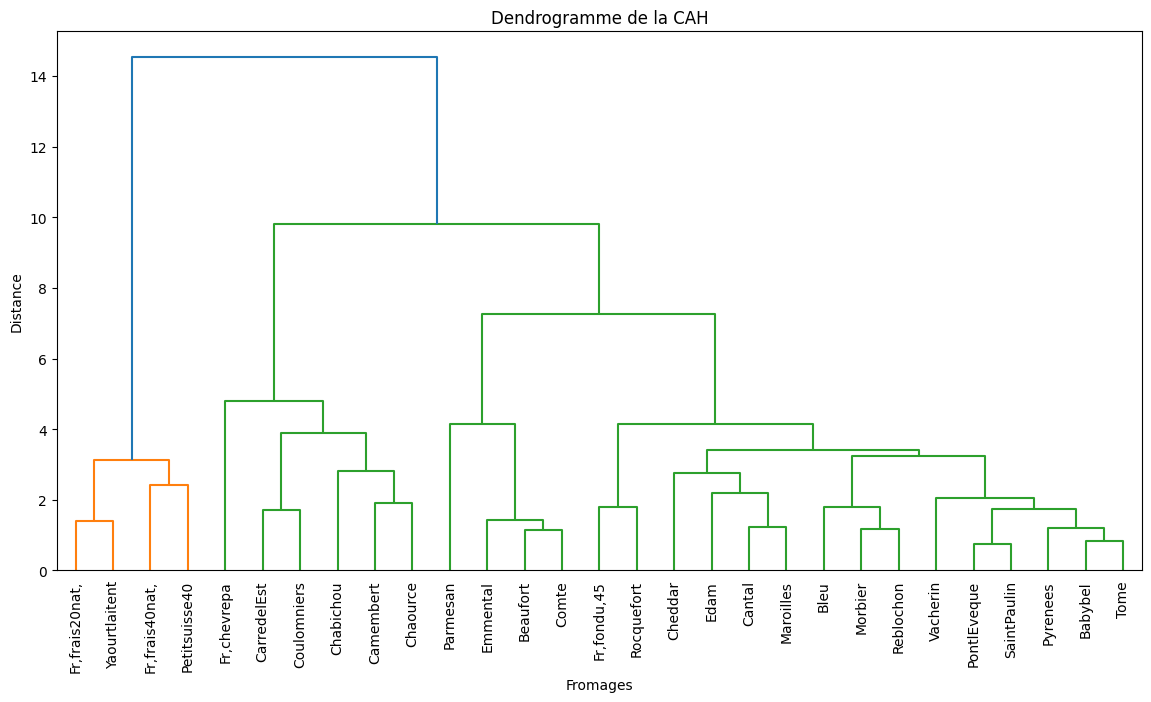

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

#on a effectue une analyse de regroupement (clustering) sur les données X,
#en utilisant la méthode de fusion d'agrégation de Ward pour calculer les liens entre les clusters.
Z = linkage(StandardisedX, method='ward')
#la méthode de Ward est basée sur le concept de minimisation de l'augmentation de la variance après la fusion des clusters

# Dendrogramme
plt.figure(figsize=(14, 7))
dendrogram(Z, labels=df["Fromages"].values, leaf_rotation=90)
plt.title("Dendrogramme de la CAH")
plt.xlabel("Fromages")
plt.ylabel("Distance")
plt.show()

Ce dendogramme nous permet de comprendre comment les différents types de fromages sont regroupés en clusters en fonction de leurs caractéristiques nutritionnelles, en identifiant les similitudes et les différences entre les différents groupes de fromages.
Par exemple, Les hauteurs des branches dans le dendrogramme indiquent le niveau de dissimilarité entre les groupes de fromages. Les branches plus longues indiquent une plus grande dissimilarité, tandis que les branches plus courtes indiquent une plus grande similarité entre les groupes de fromages.







Aprés avoir elaboré le dendogramme, on va dans une premiére partie essayer de trrouver le nombre optimal de clusters selon le Score de silhouette moyen en fonction du nombre de clusters (CAH)


Le score de silhouette moyen est une mesure de qualité couramment utilisée pour évaluer la pertinence des clusters dans un ensemble de données.

Nombre optimal de clusters selon le score de silhouette moyen : 2


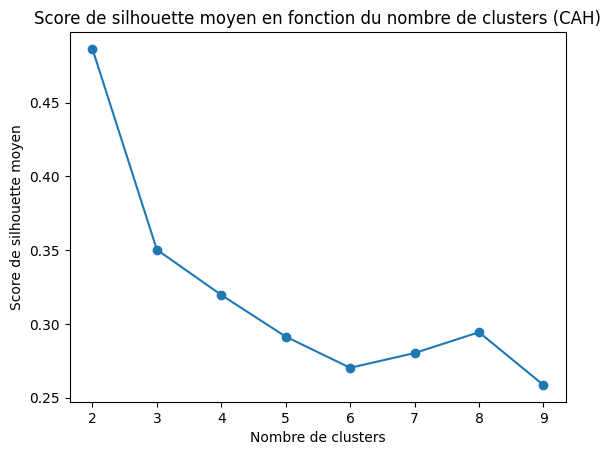

In [17]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Construire la matrice de liaisons
Z = linkage(StandardisedX, method='ward')  # X est votre ensemble de données

# Évaluation en utilisant le score de silhouette
silhouette_scores = []
best_k = None
best_score = -1

# Essayer différents nombres de clusters
for k in range(2, 10):
    # Créer les clusters en coupant l'arbre
    clusters = fcluster(Z, k, criterion='maxclust')
    # Calculer le score de silhouette pour ces clusters
    silhouette_avg = silhouette_score(StandardisedX, clusters)
    silhouette_scores.append(silhouette_avg)
    # Mettre à jour le meilleur score de silhouette et le meilleur k
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

# Afficher le meilleur k
print("Nombre optimal de clusters selon le score de silhouette moyen :", best_k)

# Tracer le score de silhouette moyen par nombre de clusters
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette moyen')
plt.title('Score de silhouette moyen en fonction du nombre de clusters (CAH)')
plt.show()


Aprés avoir trouvé que le nombre optimal de clusters est egal a 2 on va calculer l'inertie pour évaluer la qualité de la partition obtenue. 
L'inertie mesure à quel point les points d'un cluster sont proches de leur centre de gravité, également appelé centroïde.

In [28]:
from sklearn.cluster import KMeans
# Calculer l'inertie intra-classe pour le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_optimal.fit(StandardisedX)
inertia = kmeans_optimal.inertia_

# Afficher l'inertie intra-classe
print("Inertie intra-classe pour le nombre optimal de clusters :", inertia)

Inertie intra-classe pour le nombre optimal de clusters : 149.79573404588865


Dans une deuxième partie, on va utiliser la methode de coude pour revérifier le nombre optimal de clusters.


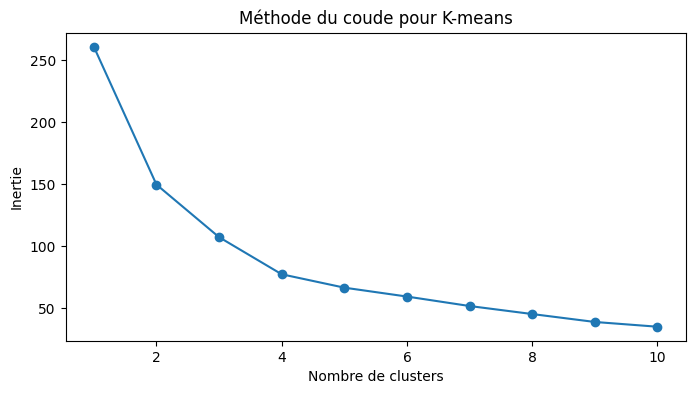

In [22]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(StandardisedX)
    inertia.append(kmeans.inertia_)

# Affichage du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour K-means')
plt.show()

D'apres le courbe, on peut dire que le nombre optimal de clusters est 3 car c'est le point où la variation commence à diminuer de manière significative, formant ainsi un coude dans le graphique.

Donc ov recalculer l'inertie afin de choisir entre les deux k trouvé.

In [35]:
from sklearn.cluster import KMeans
# Calculer l'inertie intra-classe pour le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_optimal.fit(StandardisedX)
inertia = kmeans_optimal.inertia_

# Afficher l'inertie intra-classe
print("Inertie intra-classe pour le nombre optimal de clusters :", inertia)

Inertie intra-classe pour le nombre optimal de clusters : 107.37801360106023


Pour l'inertie intra-classe, une valeur plus basse est généralement meilleure. L'inertie intra-classe mesure la cohésion des clusters, c'est-à-dire à quel point les points sont regroupés étroitement à l'intérieur de chaque cluster.


Par conséquent, lors de l'évaluation de différentes solutions de clustering, vous voudriez généralement choisir la solution qui donne la plus faible inertie intra-classe, ce qui correspond à une meilleure qualité de clustering.

C'est pour ca qu'ont va choisir k=3

Dans cette partie on va effectuer une classification des fromages en utilisant l'algorithme K-means a l'aide de la librairie scikit learn 

Appliquer l'algorithme k-means

In [75]:
# Création du modèle KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustement du modèle aux données
kmeans.fit(StandardisedX)

# Obtention des labels des clusters 
df['cluster'] = kmeans.labels_


# Affichage des résultats
print(df[['Fromages', 'cluster']])


          Fromages  cluster
0      CarredelEst        2
1          Babybel        0
2         Beaufort        0
3             Bleu        0
4        Camembert        2
5           Cantal        0
6        Chabichou        2
7         Chaource        2
8          Cheddar        0
9            Comte        0
10     Coulomniers        2
11            Edam        0
12        Emmental        0
13     Fr,chevrepa        2
14     Fr,fondu,45        0
15  Fr,frais20nat,        1
16  Fr,frais40nat,        1
17       Maroilles        0
18         Morbier        0
19        Parmesan        0
20   Petitsuisse40        1
21     PontlEveque        0
22        Pyrenees        0
23       Reblochon        0
24      Rocquefort        0
25     SaintPaulin        0
26            Tome        0
27        Vacherin        0
28   Yaourtlaitent        1


Description des clusters

In [56]:
# Analyser les caractéristiques de chaque groupe
numeric_variables = df.select_dtypes(include=['int64', 'float64'])
cluster_means = df.groupby('cluster')[numeric_variables.columns].mean()
print(cluster_means)

         calories   sodium  calcium  lipides  retinol  folates  proteines  cholesterol  magnesium
cluster                                                                                          
0         342.286  236.738  204.633   27.819    60.89   10.643     23.048       87.143     30.476
1         101.750   44.750  135.225    6.275    55.15   10.925      7.200       18.250     11.250
2         276.500  235.500  127.200   22.825   115.00   34.050     17.950       65.000     24.250


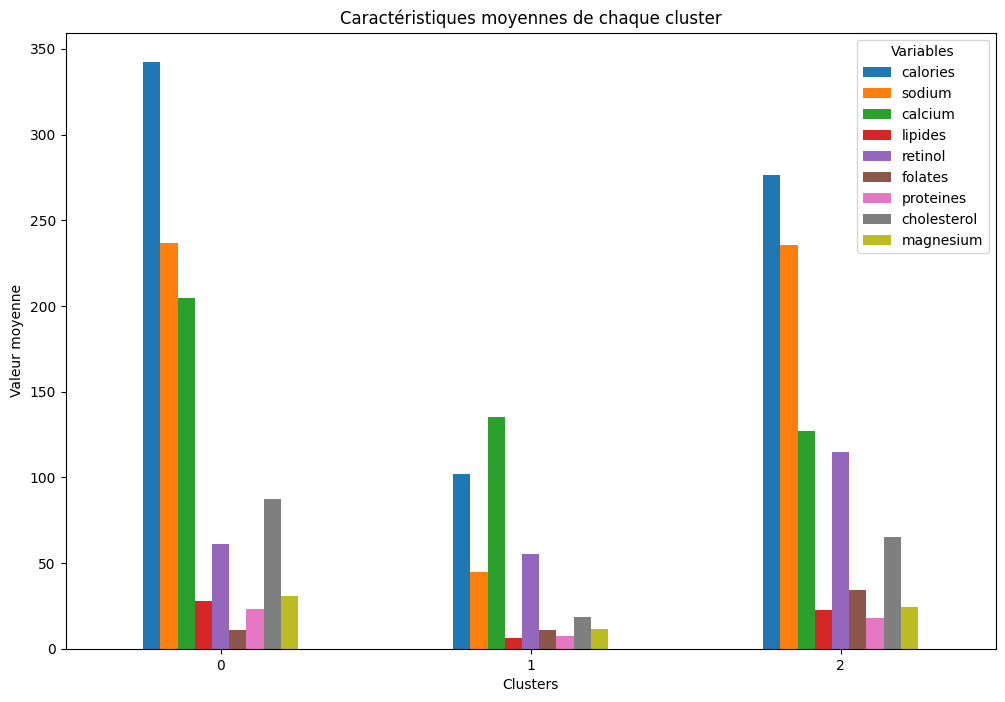

In [57]:
# Visualisation des caractéristiques de chaque groupe
cluster_means.plot(kind='bar', figsize=(12, 8))
plt.title('Caractéristiques moyennes de chaque cluster')
plt.xlabel('Clusters')
plt.ylabel('Valeur moyenne')
plt.xticks(rotation=0)
plt.legend(title='Variables')
plt.show()


L'indice de silhouette est une mesure de qualité utilisée pour évaluer la cohésion et la séparation des clusters dans un ensemble de données.

 Il mesure à quel point chaque point d'un cluster est similaire aux points de son propre cluster par rapport aux points des autres clusters.

In [66]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(StandardisedX, df['cluster'])

# Affichage du résultat
print("L'indice de silhouette moyen est :", silhouette_avg)

L'indice de silhouette moyen est : 0.3698419594208124


In [18]:
# Analyser les caractéristiques de chaque groupe
numeric_variables = df.select_dtypes(include=['int64', 'float64'])
cluster_means = df.groupby('cluster')[numeric_variables.columns].mean()
print(cluster_means)

         calories   sodium  calcium  lipides  retinol  folates  proteines  cholesterol  magnesium
cluster                                                                                          
0         322.059  281.735  172.965   26.347   67.047   16.324     20.929       78.824     25.647
1         122.600   67.800  122.740    8.720   74.220   14.940      7.980       24.600     12.200
2         373.286  137.714  256.129   29.871   64.057    7.314     26.986      100.000     40.714


Cluster 0 : Fromages riches en calories et en lipides, mais avec une teneur modérée en sodium et en cholestérol.
Exemple de fromage : Camembert


Cluster 1 : Fromages avec une teneur plus faible en calories, en lipides et en cholestérol, mais avec une teneur modérée en calcium.
Exemple de fromage : Fromage blanc


Cluster 2 : Fromages très riches en calories, en calcium et en protéines, avec une teneur élevée en lipides et en cholestérol.
Exemple de fromage : Roquefort

Dans cette partie, on va visualiser les clusters de fromages obtenus à partir de l'algorithme K-Means :

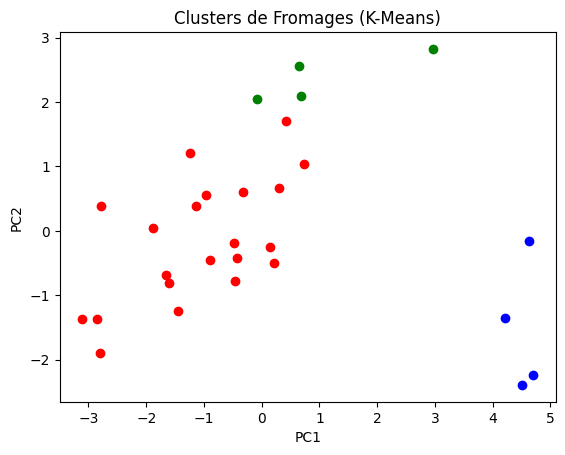

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Initialiser et entraîner le modèle K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(StandardisedX)
# Réduire la dimensionnalité avec l'ACP
#Cela signifie que nous voulons réduire la dimensionnalité de nos données à 2 dimensions en utilisant l'ACP
#puis on transforme les données X originales en un nouvel espace de dimensions réduites (2 dimensions) en utilisant les composantes principales calculées.
acp = PCA(n_components=2)
x_acp=acp.fit_transform(StandardisedX)
# Visualisation des clusters 
for couleur, k in zip(['red', 'blue', 'green'], range(3)):
    plt.scatter(x_acp[kmeans.labels_ == k, 0], x_acp[kmeans.labels_ == k, 1], c=couleur)
plt.title('Clusters de Fromages (K-Means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

PC1 capture la plus grande partie de la variance des données. PC2, quant à elle, capture la deuxième plus grande partie de la variance, 